In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_train_b_csv=r'/home/jacobo15defrutos/AVS9/5-Pruebas/total_imgs.csv'
df_train= pd.read_csv(file_train_b_csv)
labels_train= df_train['Label']
train_list=[]
target_size = (224, 224)
folder= '/home/jacobo15defrutos/AVS9/5-Pruebas/Total_images/'
for name in df_train['Name']:
    path= folder + name
    img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img= cv2.resize(img,target_size)
    img=img.ravel()
    train_list.append(img)
train= np.array(train_list)
train.shape

(285, 50176)

In [3]:
lda=LDA(n_components=2)
lda.fit(train,labels_train)

LinearDiscriminantAnalysis(n_components=2)

In [4]:
train_SANO_list=[]
train_CMV_list=[]
train_SURV_list=[]
target_size = (224, 224)
folder= '/home/jacobo15defrutos/AVS9/5-Pruebas/Total_images/'
for name in df_train['Name']:
    path= folder + name
    img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img= cv2.resize(img,target_size)
    img=img.ravel()
    if 'SANO' in name:
        train_SANO_list.append(img)
    elif 'CMV' in name:
        train_CMV_list.append(img)
    elif 'SURV' in name:
        train_SURV_list.append(img)
train_SANO= np.array(train_SANO_list)
train_CMV= np.array(train_CMV_list)
train_SURV= np.array(train_SURV_list)

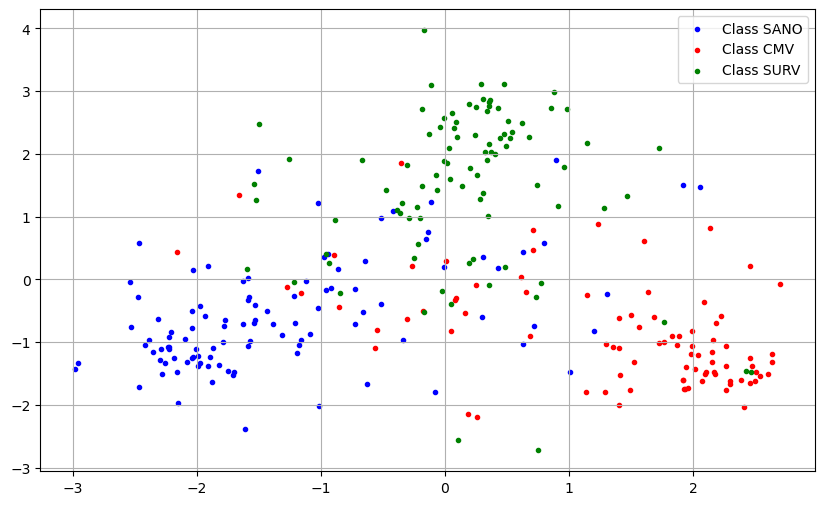

In [5]:
x_sano=lda.transform(train_SANO)
x_cmv=lda.transform(train_CMV)
x_surv=lda.transform(train_SURV)
figsize=(10,6)
fig ,ax = plt.subplots(figsize=figsize)
ax.grid()
ax.scatter(x_sano[:,0],x_sano[:,1],c='b',marker=".",label="Class SANO")
ax.scatter(x_cmv[:,0],x_cmv[:,1],c='r',marker=".",label="Class CMV")
ax.scatter(x_surv[:,0],x_surv[:,1],c='g',marker=".",label="Class SURV")
ax.legend()